In [6]:
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X=iris.data
y=iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))






1.0


Best parameters: {'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_split': 3}


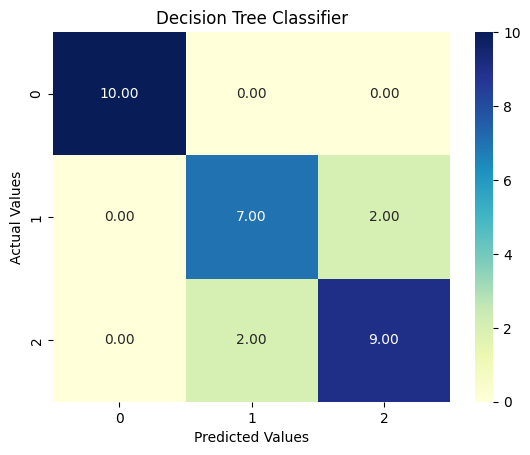

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

X, y = load_iris(return_X_y=True)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),
    DecisionTreeClassifier()
)

param_grid = {
     "decisiontreeclassifier__max_depth": [2, 4, 5, 6],
    "decisiontreeclassifier__min_samples_split": [2, 3, 4]
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv = 5,
    scoring='accuracy'

)
grid.fit(X_train, y_train)
best_param = grid.best_params_
grid_pred = grid.predict(X_test)
print("Best parameters:", best_param)


gd_accuracy = accuracy_score(y_test, grid_pred)
gd_confusion = confusion_matrix(y_test, grid_pred)
gd_classification_report = classification_report(y_test, grid_pred)


sns.heatmap(gd_confusion, annot=True, fmt=".2f", cbar=True, cmap="YlGnBu")
plt.title("Decision Tree Classifier")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()



Best parameters: {'randomforestregressor__max_depth': 6, 'randomforestregressor__min_samples_split': 3}
MSE: 34752.2559
R2 Score: 0.8425


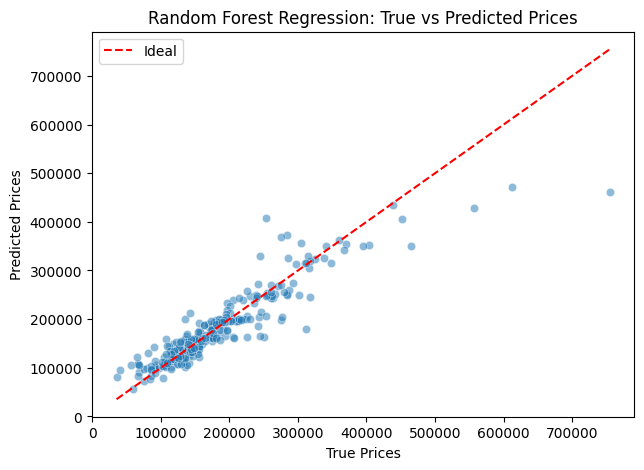

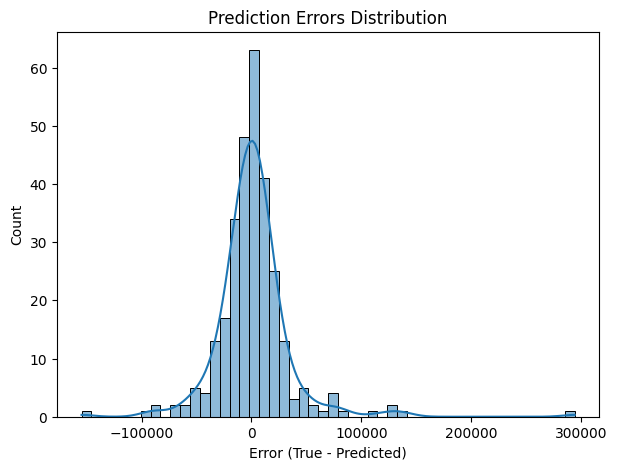

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np


data = fetch_openml(name='house_prices', as_frame=True)
X = data.data.select_dtypes(include='number').fillna(0)
y = data.target


y = np.array(y).astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),
    RandomForestRegressor(random_state=42)
)

param_grid = {
    "randomforestregressor__max_depth": [2, 4, 5, 6],
    "randomforestregressor__min_samples_split": [2, 3, 4]
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error' # Could also use 'r2'
)

grid.fit(X_train, y_train)
best_params = grid.best_params_
grid_pred = grid.predict(X_test)

print("Best parameters:", best_params)


mse = mean_squared_error(y_test, grid_pred)
mse = np.sqrt(mse)
r2 = r2_score(y_test, grid_pred)
print(f"MSE: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=grid_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.title("Random Forest Regression: True vs Predicted Prices")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()


plt.figure(figsize=(7,5))
sns.histplot(y_test - grid_pred, bins=50, kde=True)
plt.title("Prediction Errors Distribution")
plt.xlabel("Error (True - Predicted)")
plt.ylabel("Count")
plt.show()

Accuracy: 0.975


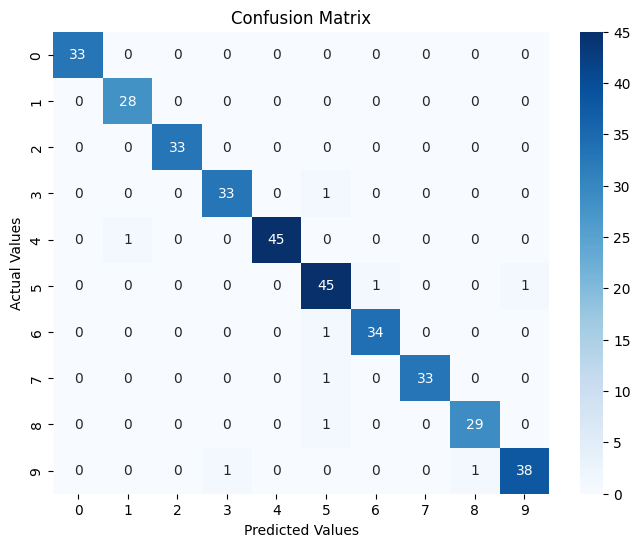

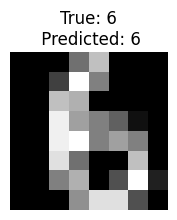

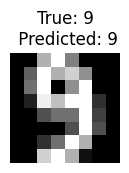

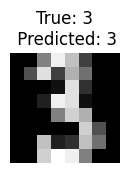

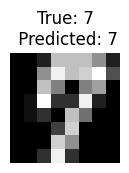

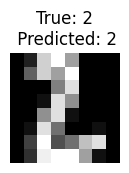

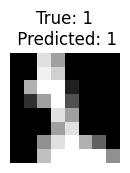

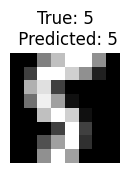

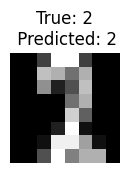

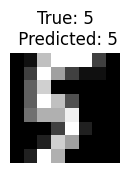

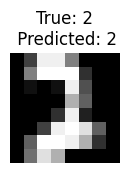

In [30]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


digit = load_digits()
X = digit.data
y = digit.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


plt.figure(figsize=(10,4))
for idx, image_index in enumerate(range(10)):
    plt.subplot(2,5,idx+1)
    plt.imshow(X_test[image_index].reshape(8,8), cmap='gray')
    plt.title(f"True: {y_test[image_index]}\n Predicted: {y_pred[image_index]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()